# Entrega Final - Sebastián Segura

# Sección 1 - Presenetación del problema 
El dataset seleccionado contiene distintas variables acerca de los clientes de un banco que han contraido una deuda con el mismo. 

La problemática que va a tratar el proyecto es la mora en el pago de la deuda. Una de las fuentes de ingresos de los bancos es el interés cobrado por el financiamiento a terceros, siempre y cuando estos paguen. Para intentar reducir ese riesgo al máximo, se intentará detectar relaciones y en cierto punto, se podrá llegar a predecir que clientes pueden caer en default. 

# Sección 2 - Preguntas y objetivos de la investigación


*   ¿Qué porcentaje de los clientes se encuentra en mora?
*   ¿Cuál es el proposito más común por el cual se piden los créditos?
*   ¿En qué plazo prefieren pagar la deuda los clientes?
*   ¿Existe relación entre el plazo y el default?
*   ¿Existen muchos clientes con baja calificación?
*   ¿Los clientes usan todo el crédito disponible?
*   ¿Tiene que ver el ingreso anual con el pago del crédito?
*   ¿La gente se endeuda mucho con respecto a sus ingresos?
*   ¿Los clientes son empleados hace mucho tiempo?
*   ¿Hay relación entre los clientes con antecedentes y el impago?
*   ¿Cuál es el rango de ingresos anuales?
*   ¿Los clientes que son dueños de sus inmuebles llevan la deuda al día?



```
# Pregunta central: ¿Cuáles son las características en común entre los clientes en mora? 
```





# Sección 3 - Importación de librerias
A continuación, se importan todas las librerías de Python que utilizaré a lo largo del proyecto

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=e5442e0838e332929f87992b45badec9ea44ce9659d69864f828ae90fdf11562
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
import category_encoders as ce
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42

# Sección 4 - Data Acquisition - Dataset
En este apartado voy a subir el dataset, más tarde será modificado para un mejor resultado del proyecto. 

Fue extraido de *Kaggle* (https://www.kaggle.com/datasets/qusaybtoush1990/machine-learning).


In [ ]:
banco = pd.read_csv('datos.csv')
#La funión head nos trae, por defecto, las primeras cinco filas de una base de datos
banco.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


# Sección 5 - Análisis exploratorio de datos (EDA) (continuación en gráficos)
En este apartado se realiza el análisis univariado, bivariado y multivariado. En primer lugar se realiza un análisis general sobre estadísticas y el tipo de datos. En segun lugar, se generan funciones para poder realizar gráficos. Y, por último, se utilizan las funciones para realizar gráficos de cada variable.

In [ ]:
banco.describe().round(0)

,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,19779.0,19779.0,19779.0,19779.0,19779.0,19779.0,19779.0,19779.0,19779.0,19779.0
mean,5.0,66838.0,0.0,7.0,17.0,1.0,56.0,0.0,1.0,0.0
std,1.0,26604.0,0.0,4.0,8.0,0.0,23.0,0.0,0.0,0.0
min,1.0,8412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.0,47000.0,0.0,3.0,11.0,0.0,39.0,0.0,0.0,0.0
50%,5.0,65000.0,0.0,7.0,16.0,1.0,57.0,0.0,1.0,0.0
75%,6.0,82000.0,0.0,11.0,22.0,1.0,74.0,0.0,1.0,0.0
max,7.0,149000.0,1.0,11.0,35.0,1.0,113.0,15.0,1.0,1.0


In [ ]:
banco.describe(include=[np.object_])

,home_ownership,purpose,term
count,19779,19779,19779
unique,3,12,3
top,MORTGAGE,debt_consolidation,36 months
freq,11220,12210,14822


In [ ]:
#Tipo de dato de las variables
banco.dtypes.sort_values(ascending=True)

grade                   int64
short_emp               int64
emp_length_num          int64
last_delinq_none        int64
bad_loan                int64
annual_inc            float64
dti                   float64
revol_util            float64
total_rec_late_fee    float64
od_ratio              float64
home_ownership         object
purpose                object
term                   object
dtype: object

In [ ]:
#Cuenta de cada tipo de dato de las variables
banco.dtypes.value_counts()

int64      5
float64    5
object     3
dtype: int64

,absolute,percent
0,15938,80.58
1,3841,19.42


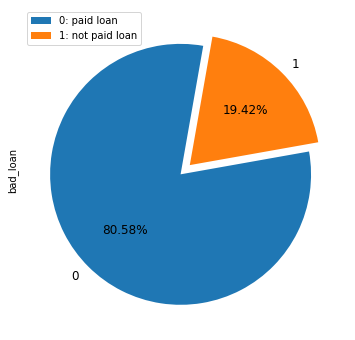

In [ ]:
#Cuadro de proporcón gente que pagó y que no pagó su deuda; (en ABSOLUTO y PORCENTAJE)
loan = banco.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

#Gráfico torta para ver lo mismo 
banco.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);

In [ ]:
#Busqueda de valores nulos (NaN). Estos serán manejados más adelante en el apartado de Data Wrangling
nulval = banco.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval


,absolute,percent
grade,0,NaN
annual_inc,0,NaN
short_emp,0,NaN
emp_length_num,0,NaN
home_ownership,0,NaN
dti,0,NaN
purpose,0,NaN
term,0,NaN
last_delinq_none,0,NaN
revol_util,0,NaN


# 5.1  Funciones
Para poder realizar los gráficos que permitan visulizar los datos, voy a extraer algunas funciones de un notebook. 

In [ ]:
# Estadisticas generales 
def stats(x):
    print(f"Variable: {x}")
    print(f"Type of variable: {banco[x].dtype}")
    print(f"Total observations: {banco[x].shape[0]}")
    detect_null_val = banco[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {banco[x].isnull().sum()} ({(banco[x].isnull().sum() / banco[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values? {banco[x].isnull().values.any()}")
    print(f"Unique values: {banco[x].nunique()}")
    if banco[x].dtype != "O":
        print(f"Min: {int(banco[x].min())}")
        print(f"25%: {int(banco[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(banco[x].median())}")
        print(f"75%: {int(banco[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(banco[x].max())}")
        print(f"Mean: {banco[x].mean()}")
        print(f"Std dev: {banco[x].std()}")
        print(f"Variance: {banco[x].var()}")
        print(f"Skewness: {scipy.stats.skew(banco[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(banco[x])}")
        print("")
        print("Percentiles 1%, 5%, 95%, 99%")
        display(banco[x].quantile(q=[.01, .05, .95, .99]))
        print("")
    else:
        print(f"List of unique values: {banco[x].unique()}")

# Gráfico de variable vs. target
def target(x):
    short_0 = banco[banco.bad_loan == 0].loc[:,x]
    short_1 = banco[banco.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6 , label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.ylabel('Relative frequency')
    plt.xlabel('Absolute frequency')
    plt.show()

# Boxplot + Histograma
def boxhist(x):
    variable = banco[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)

    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')

    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

# Histograma
def hist(x):
    plt.hist(banco[x], bins=25)
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

# Gráfico de torta
def pie(x):
    banco[x].value_counts(dropna=False).plot(kind='pie', figsize=(6,5), fontsize=10, autopct='%1.1f%%', startangle=0, legend=True, textprops={'color':"white", 'weight':'bold'});

# Gráfico de barras
def bar(x):
    ax = banco[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.xlabel(x, fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel("Absolute values", fontsize=10)
    plt.title(x, fontsize=10, loc="right")

# Barh
def barh(x):
    banco[x].value_counts().plot(kind="barh", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    plt.xlabel("Absolute values", fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel(x, fontsize=10)
    plt.title(x, fontsize=10, loc="right")

# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = banco.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = banco.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

# 5.2 EDA - Gráficos

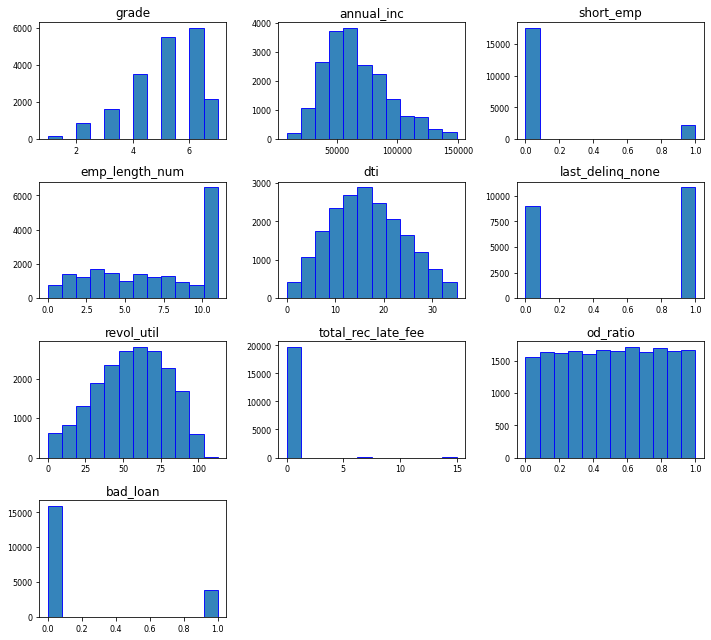

In [ ]:
#distribución de variables numéricas
banco.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.savefig('books_read.png')
plt.show()


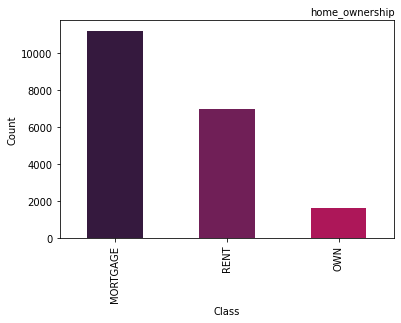

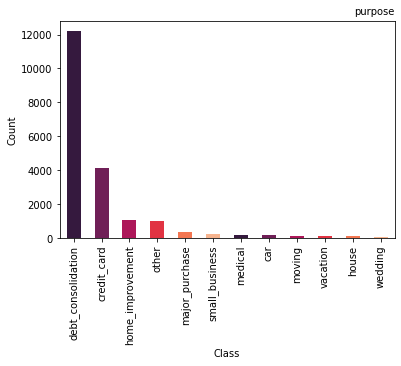

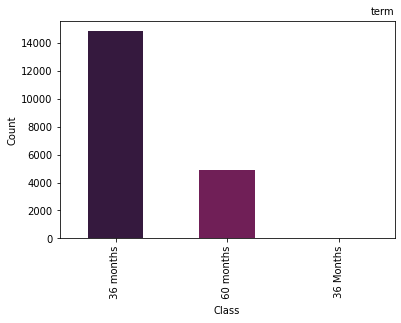

In [ ]:
#histograma por variable categóricas
for col in banco.select_dtypes(include=["object"]).columns:
    banco[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.savefig('categoricos.png')
    plt.show()

In [ ]:
#Como vemos en el gráfico de arriba, toma dos veces 36 meses por la mayuscula, a continuación se corrige 
banco.term = banco.term.str.lower()
banco.term.value_counts()

 36 months    14853
 60 months     4926
Name: term, dtype: int64

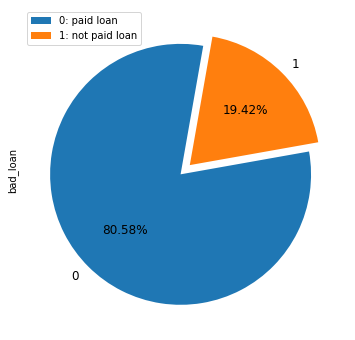

In [ ]:
banco.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);

**Grade**

calfificación de los clientes

In [ ]:
stats("grade")

Variable: grade
Type of variable: int64
Total observations: 19779
Missing values? False
Unique values: 7
Min: 1
25%: 4
Median: 5
75%: 6
Max: 7
Mean: 5.018605591789272
Std dev: 1.3257324944692175
Variance: 1.7575666468915738
Skewness: -0.6165069675014548
Kurtosis: -0.021307176973570208

Percentiles 1%, 5%, 95%, 99%


0.01    2.0
0.05    2.0
0.95    7.0
0.99    7.0
Name: grade, dtype: float64

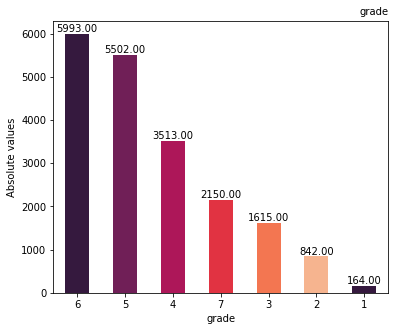

In [ ]:
#histograma por caada clase
plt.savefig('grade.png')
bar("grade")

home_ownership,MORTGAGE,OWN,RENT
grade,,,
A,10125413622,1317629640,4051026441
B,23885885410,3462708590,14760476369
C,20610251432,3556938433,15150732416
D,11302570597,2341863113,11151017359
E,5710749816,1018416369,4929639589
F,2609177317,666981482,2724192127
G,536342691,109804609,529908890


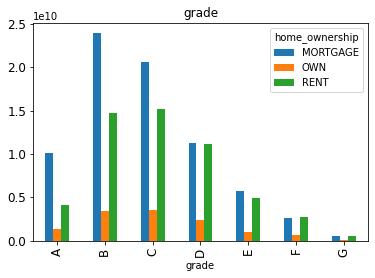

In [ ]:
pivot_sum("home_ownership","grade","id")

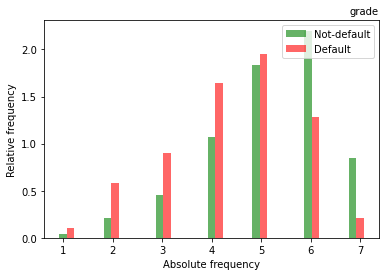

In [ ]:
target("grade")

**Ingreso Anual**

In [ ]:
stats("annual_inc")

Variable: annual_inc
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 2566
Min: 8412
25%: 47000
Median: 65000
75%: 88000
Max: 1000000
Mean: 73349.57835
Std dev: 45198.567254725625
Variance: 2042910481.8799553
Skewness: 5.275648123592321
Kurtosis: 66.72665803201564

Percentiles 1%, 5%, 95%, 99%


0.01     20519.5
0.05     30000.0
0.95    145000.0
0.99    225000.0
Name: annual_inc, dtype: float64

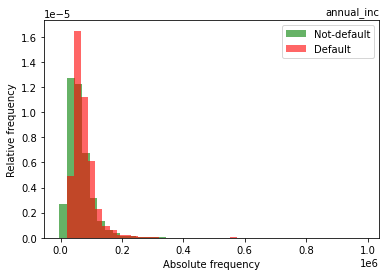

In [ ]:
#relación entre el ingreso y el estado de la deuda
target("annual_inc")

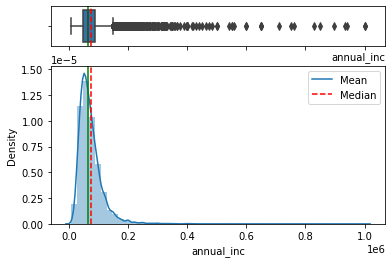

In [ ]:
#distribución del ingreso en los clientes
#los outliers son corregidos más adelante
boxhist("annual_inc")

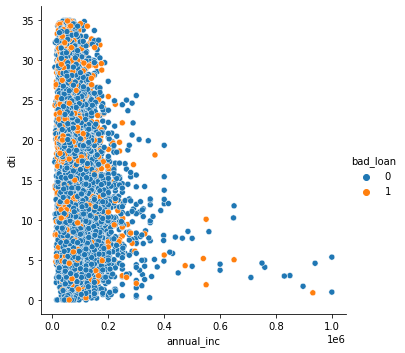

In [ ]:
#relación entre el ratio deuda ingreso y el ingreso anual
sns.relplot(data=banco, x="annual_inc", y="dti", hue="bad_loan") 

**Short Emp**



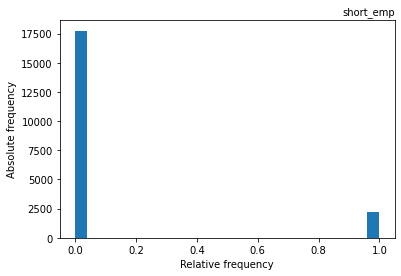

In [ ]:
#histograma de clientes que trabajana hace menos de un año. 
hist("short_emp")

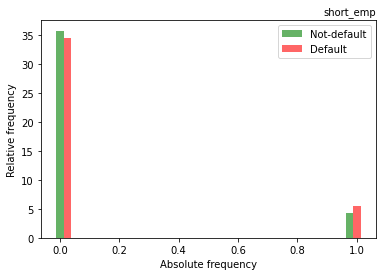

In [ ]:
#relación estado de deuda y clientes empleados recientemente. 
target("short_emp")


**emp_length_num**

Duración del empleo del cliente en años. Los valores van desde 0 a 10, donde 0 es menor a un año y 10 son diez o más años. 

In [ ]:
stats("emp_length_num")

Variable: emp_length_num
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 12
Min: 0
25%: 3
Median: 7
75%: 11
Max: 11
Mean: 6.8214
Std dev: 3.7742302898358013
Variance: 14.244814280714037
Skewness: -0.27964924120655704
Kurtosis: -1.3664296257576731

Percentiles 1%, 5%, 95%, 99%


0.01     0.0
0.05     1.0
0.95    11.0
0.99    11.0
Name: emp_length_num, dtype: float64

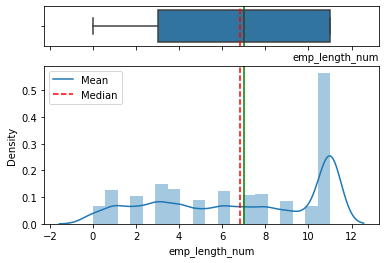

In [ ]:
#estadisticas de forma gráfica
boxhist("emp_length_num")

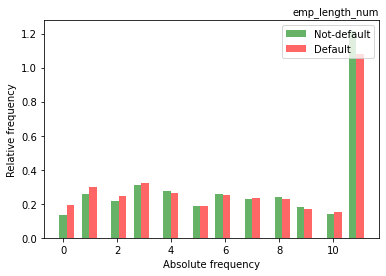

In [ ]:
#relacion estado de la deuda y años trabajados
target("emp_length_num")

bad_loan,0,1
purpose,,
car,5.760870,4.500000
credit_card,6.716414,6.405007
debt_consolidation,7.030945,6.589271
home_improvement,7.076050,6.854271
house,5.776471,4.500000
major_purchase,6.280277,6.180723
medical,6.925926,6.459459
moving,5.869565,4.321429
other,6.797315,6.659004


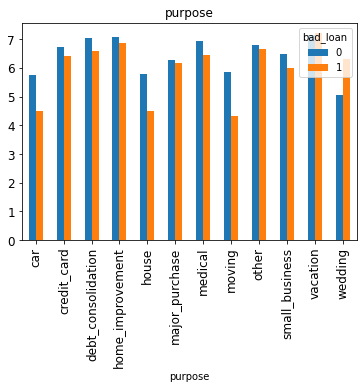

In [ ]:
#proposito del préstamo, promedio de años trabajado, separados por estado de deuda. 
pivot_mean("bad_loan", "purpose", "emp_length_num")

Las vacaciones y los casamientos suelen ser en promedio, los présteamos que han terminado sin ser pagados. 

**Home ownership (tipo de tenencia de la vivienda)**

Sus valores pueden ser: alquiler (rent), own (dueños) o hiptecas (mortgage)

In [ ]:
stats("home_ownership")

Variable: home_ownership
Type of variable: object
Total observations: 19779
Missing values? False
Unique values: 3
List of unique values: ['RENT' 'OWN' 'MORTGAGE']


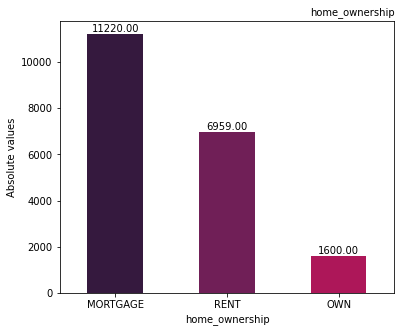

In [ ]:
bar("home_ownership")

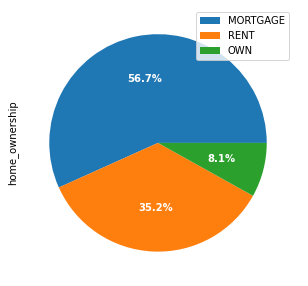

In [ ]:
pie("home_ownership")

bad_loan,0,1
home_ownership,,
MORTGAGE,62024618628,12755772257
OWN,10069692998,2404649238
RENT,40735387375,12561605816


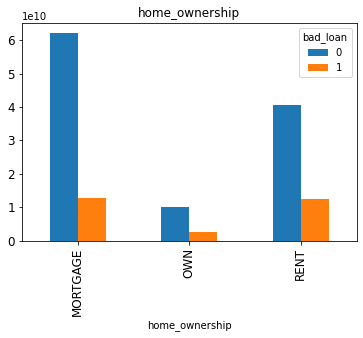

In [ ]:
pivot_sum("bad_loan", "home_ownership", "id")

No existen diferencias entre la relación del tipo de tenencia de la vivienda y el impago de la deuda. 

**DTI : Ratio deuda/ingreso** 

In [ ]:
stats("dti")

Variable: dti
Type of variable: float64
Total observations: 19779
Missing values? False
Unique values: 3286
Min: 0
25%: 10
Median: 16
75%: 21
Max: 34
Mean: 16.577306261782237
Std dev: 7.545281160204273
Variance: 56.931267786533546
Skewness: 0.17833335037111245
Kurtosis: -0.6304121983432869

Percentiles 1%, 5%, 95%, 99%


0.01     1.8156
0.05     4.6900
0.95    29.6500
0.99    33.4200
Name: dti, dtype: float64

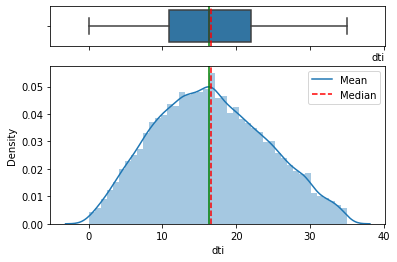

In [ ]:
#distribución del dti
boxhist("dti")

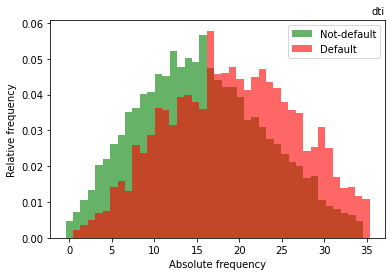

In [ ]:
target("dti")

Los malos préstamos o impagos (los que estan en rojo) están asociados, en promedio, con un dti más elevado. A más efuerzo, más impago. 

**Proposito** 

Motivo, brindado por el cliente, al cual se destina el préstamo. 

In [ ]:
stats("purpose")

Variable: purpose
Type of variable: object
Total observations: 19779
Missing values? False
Unique values: 12
List of unique values: ['credit_card' 'debt_consolidation' 'medical' 'other' 'home_improvement'
 'small_business' 'major_purchase' 'vacation' 'car' 'house' 'moving'
 'wedding']


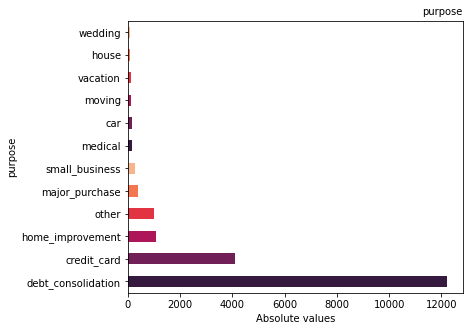

In [ ]:
barh("purpose")

bad_loan,0,1
purpose,,
car,1070129314,216325988
credit_card,26386780714,5340476464
debt_consolidation,75102879435,18555640551
home_improvement,6644887055,1502903381
house,637766829,103586113
major_purchase,2178415440,660763827
medical,1073061905,307640771
moving,701823712,219651796
other,5725665050,1988147906


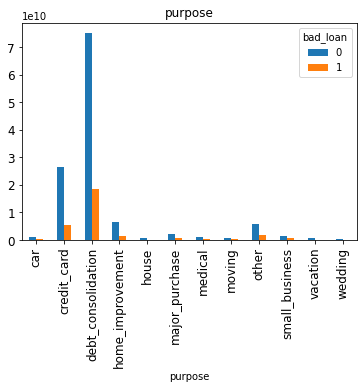

In [ ]:
pivot_sum("bad_loan", "purpose", "id")

**Term**

En cuanto tiempo será pagado el préstamo, expresado en meses. Puede tomar el valor de 36 0 60.

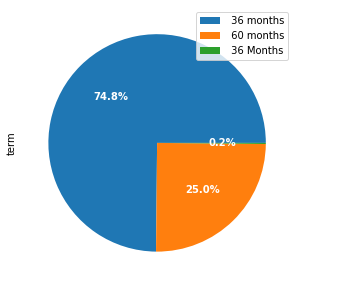

In [ ]:
pie("term")

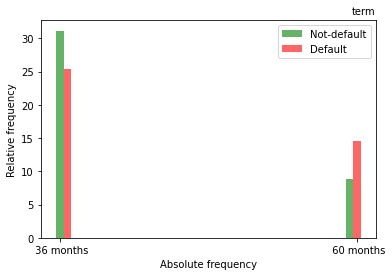

In [ ]:
target("term")

Vemos que el default ocurre con una probabilidad inversa, cuando el préstamo es a 60 meses. 

term,36 months,60 months
grade,,
1,77667.927920,75174.499797
2,59820.683215,72134.755571
3,62776.607780,71813.721444
4,60355.927303,72577.464414
5,63171.916089,71224.691813
6,65767.337698,76387.413783
7,72792.849438,79153.999825


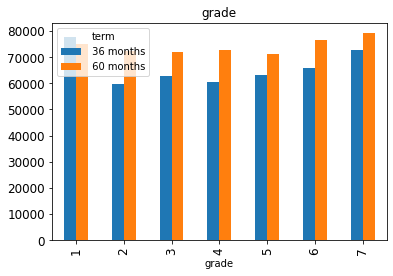

In [ ]:
pivot_mean("term", "grade", "annual_inc")

Es más comun que los clientes pidan préstamos a 60 meses, salvo únicamente los clientes de categoría G. 

**Antecedentes (last_delinq_none)**

Este columna es para saber si el cliente ha cometido algún delito (tiene antecedentes = 1 ). 

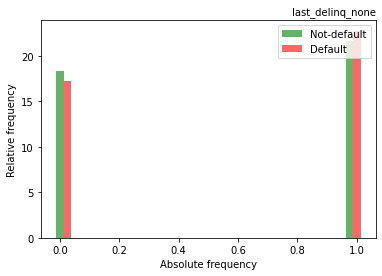

In [ ]:
target("last_delinq_none")

Casualmente y como se podía esperar, los clientes que defaultean tienen antecedentes. 

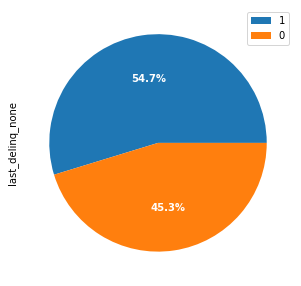

In [ ]:
#porcentaje de clientes con antecedentes
pie("last_delinq_none")

In [ ]:
stats("last_delinq_none")

Variable: last_delinq_none
Type of variable: int64
Total observations: 19779
Missing values? False
Unique values: 2
Min: 0
25%: 0
Median: 1
75%: 1
Max: 1
Mean: 0.5472470802366146
Std dev: 0.49777529152155814
Variance: 0.2477802408493722
Skewness: -0.18983776600212288
Kurtosis: -1.9639616225993233

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: last_delinq_none, dtype: float64

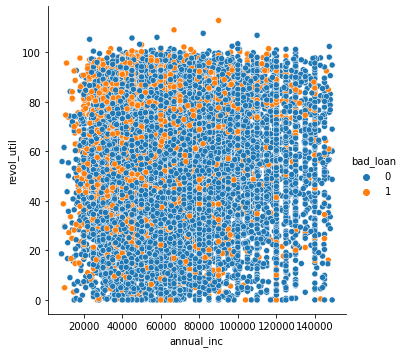

In [ ]:
sns.relplot(data=banco, x="annual_inc", y="revol_util", hue="bad_loan") 

**total_rec_late_fee**

Pago de comisiones con atraso

In [ ]:
stats("total_rec_late_fee")

Variable: total_rec_late_fee
Type of variable: float64
Total observations: 19779
Missing values? False
Unique values: 11
Min: 0
25%: 0
Median: 0
75%: 0
Max: 14
Mean: 0.0055808888214773245
Std dev: 0.28232761940829504
Variance: 0.07970888468075508
Skewness: 51.714141344184846
Kurtosis: 2695.6561273253405

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    0.0
0.99    0.0
Name: total_rec_late_fee, dtype: float64

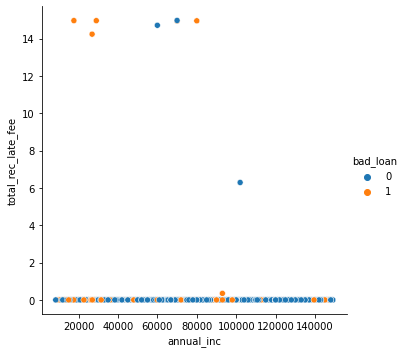

In [ ]:
sns.relplot(data=banco, x="annual_inc", y="total_rec_late_fee", hue="bad_loan") 

In [ ]:
income = banco['annual_inc']
banco.total_rec_late_fee.corr(income)

-0.009758301144068518

**Od-ratio**

Ratio de overdraft

In [ ]:
stats("od_ratio")

Variable: od_ratio
Type of variable: float64
Total observations: 19779
Missing values? False
Unique values: 19779
Min: 0
25%: 0
Median: 0
75%: 0
Max: 0
Mean: 0.5044184037232009
Std dev: 0.2877934790549539
Variance: 0.0828250865865542
Skewness: -0.020931157379902532
Kurtosis: -1.1928257345931346

Percentiles 1%, 5%, 95%, 99%


0.01    0.009890
0.05    0.051477
0.95    0.951461
0.99    0.989996
Name: od_ratio, dtype: float64

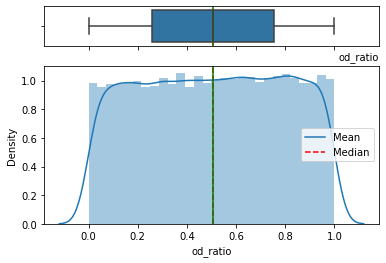

In [ ]:
boxhist("od_ratio")

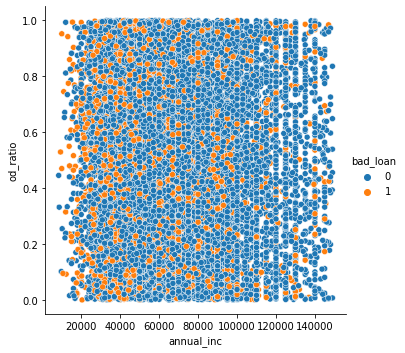

In [ ]:
#relación overdraft-ingreso-estado de deuda. En promedio se comportan todos de la misma manera
sns.relplot(data=banco, x="annual_inc", y="od_ratio", hue="bad_loan") 

**Bad Loan : Default**

0 si no está mora ; 1 si está en mora

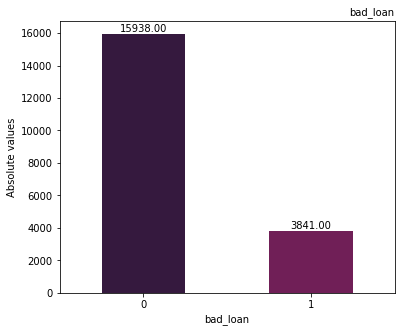

In [ ]:
bar("bad_loan")

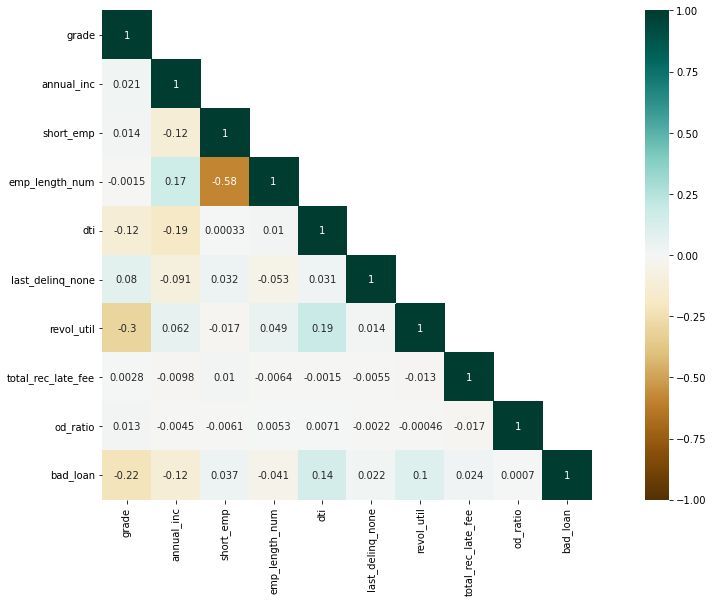

In [ ]:
#Correlación
mask = np.triu(banco.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(banco.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [ ]:
#correlación en tabla
bad_loan_c = pg.pairwise_corr(banco, columns=['bad_loan'], method='pearson').loc[:,['X','Y','r']]
bad_loan_c.sort_values(by=['r'], ascending=False)

,X,Y,r
4,bad_loan,dti,0.139438
6,bad_loan,revol_util,0.101255
2,bad_loan,short_emp,0.036799
7,bad_loan,total_rec_late_fee,0.023984
5,bad_loan,last_delinq_none,0.021575
8,bad_loan,od_ratio,0.000701
3,bad_loan,emp_length_num,-0.040612
1,bad_loan,annual_inc,-0.122683
0,bad_loan,grade,-0.223809


La variable más correlacionada con el default (target) es el dti, con una correlación positiva moderada de 0.14

# Sección 6 - Data Wrangling 
En este apartado se moldea el dataset, preparandolo para poder entrenar el modelo de machine learing. Se limpian los valores nulos y se eliminan los outliers.

**Outliers**

In [ ]:
#Se filtran los datos númericos y categóricos

data_ca = banco.select_dtypes(exclude=["int64","float64"]).copy()
data_nu = banco.select_dtypes(exclude=["object","category"]).copy()

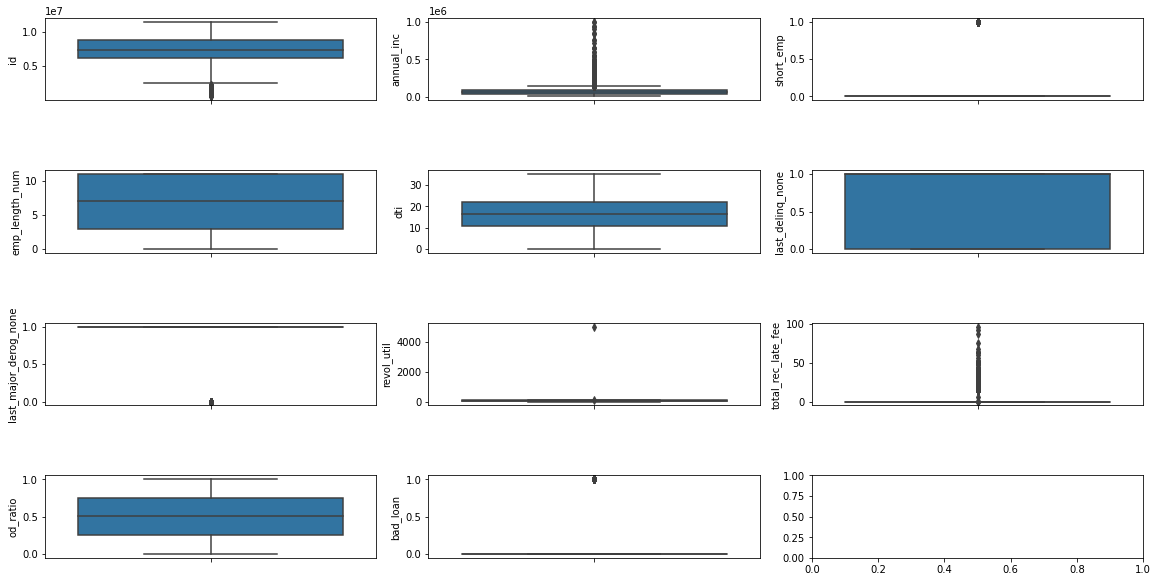

In [ ]:
#Boxplot para ver los datos númericos

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 8))
index = 0
axs = axs.flatten()
for k,v in data_nu.items():
    sns.boxplot(y=k, data=data_nu, ax=axs[index], orient="")
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
display(banco.describe().loc[["mean","50%","std"]].loc[:,["annual_inc","revol_util","total_rec_late_fee"]])

,annual_inc,revol_util,total_rec_late_fee
mean,73349.578350,55.958148,0.290622
50%,65000.000000,57.100000,0.000000
std,45198.567255,42.117456,3.108654


Existen outliers en las categorías ingreso, revol_util y los atrasos en las comisiones. A continuación, se resuelven.

**Ingreso**

In [ ]:
print(banco.annual_inc.describe())

count      20000.000000
mean       73349.578350
std        45198.567255
min         8412.000000
25%        47000.000000
50%        65000.000000
75%        88000.000000
max      1000000.000000
Name: annual_inc, dtype: float64


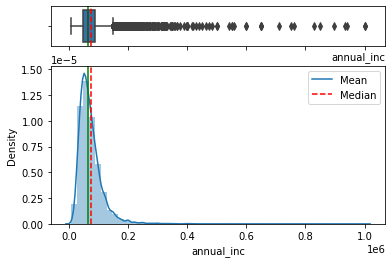

In [ ]:
boxhist("annual_inc")

Como vemos en el gráfico de arriba, los puntos nos muestran ingresos de algunos clientes que se desvian mucho con respecto a la media.

In [ ]:
# Dealing with the outliers through IQR score method
Q1 = banco['annual_inc'].quantile(0.25)
Q3 = banco['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
banco['annual_inc'] = banco.annual_inc[~((banco.annual_inc < (Q1 - 1.5 * IQR)) |(banco.annual_inc > (Q3 + 1.5 * IQR)))]

print(banco.annual_inc.describe())

count     19074.000000
mean      66792.117857
std       27241.646991
min        8412.000000
25%       46000.000000
50%       62000.000000
75%       84000.000000
max      149000.000000
Name: annual_inc, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


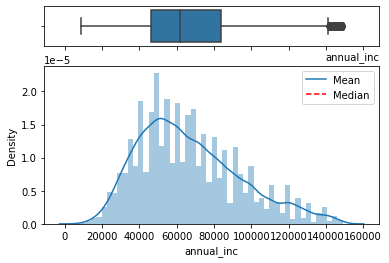

In [ ]:
boxhist("annual_inc")

In [ ]:
#se elimina el outlier
print(int(data_nu.annual_inc.describe()[0]) - int(banco.annual_inc.describe()[0]),"outliers were removed with this operation.")

926 outliers were removed with this operation.


**revol_util**

In [ ]:
print(banco.revol_util.describe())

count    20000.000000
mean        55.958148
std         42.117456
min          0.000000
25%         38.800000
50%         57.100000
75%         73.900000
max       5010.000000
Name: revol_util, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


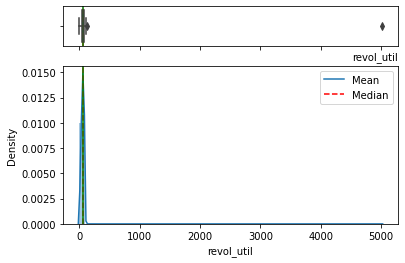

In [ ]:
boxhist("revol_util")

In [ ]:
value = banco.revol_util.quantile([.99999])
p = value.iloc[0]
banco = banco[banco["revol_util"] < p]

print(banco['revol_util'].describe())

count    19999.000000
mean        55.710434
std         23.380722
min          0.000000
25%         38.800000
50%         57.100000
75%         73.900000
max        128.100000
Name: revol_util, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


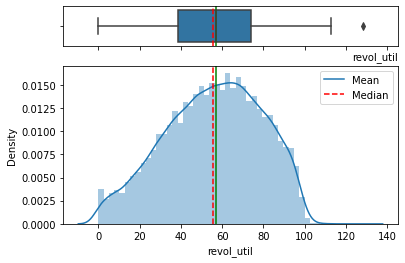

In [ ]:
boxhist("revol_util")

In [ ]:
#se elimina el outlier
print(int(data_nu.revol_util.describe()[0]) - int(banco.revol_util.describe()[0]),"outlier was removed with this operation.")

1 outlier was removed with this operation.


**Pago de comisiones atrasados** (total_rec_late_fee) 



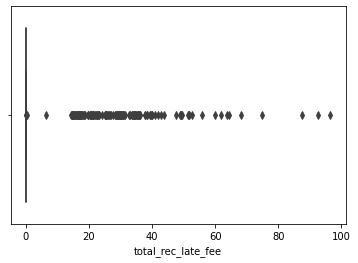

In [ ]:
#dispersión de los datos
sns.boxplot(x=banco['total_rec_late_fee'],data=banco)
plt.xlabel('total_rec_late_fee', fontsize=10)
plt.show()

In [ ]:
#se eliminan los outliers
value = banco.total_rec_late_fee.quantile([.989])
p = value.iloc[0]
banco = banco[banco["total_rec_late_fee"] < p]

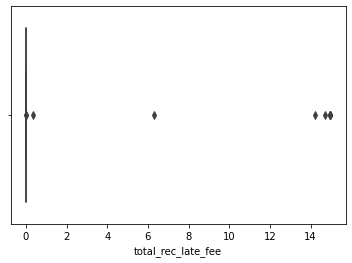

In [ ]:
#vemos el resultado 
sns.boxplot(x=banco['total_rec_late_fee'],data=banco)
plt.xlabel('total_rec_late_fee', fontsize=10)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


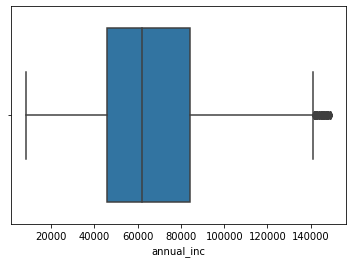

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


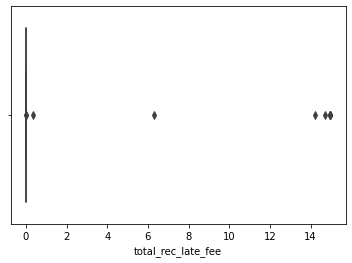

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


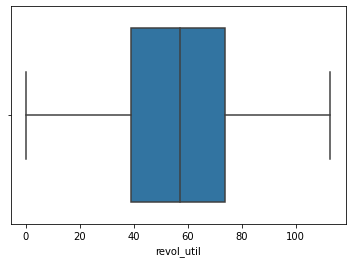

In [ ]:
for col in banco[["annual_inc", "total_rec_late_fee", "revol_util"]].columns:
    sns.boxplot(banco[col])
    plt.show()

Se ve que hay algunos outliers que no fueron removidos, simplemente el código los deja.

**Nulos**

In [ ]:
for column in banco.columns:
    if banco[column].isna().sum() != 0:
        missing = banco[column].isna().sum()
        portion = (missing / banco.shape[0]) * 100
        print(f"'{column}': número de valores nulos'{missing}' ---> '{portion:.3f}%'")

'annual_inc': número de valores nulos'915' ---> '4.626%'
'home_ownership': número de valores nulos'1476' ---> '7.462%'
'dti': número de valores nulos'152' ---> '0.768%'
'last_major_derog_none': número de valores nulos'19208' ---> '97.113%'


**Ingreso**|

In [ ]:
banco.annual_inc.value_counts(dropna=False)

NaN         915
60000.0     771
50000.0     729
65000.0     607
70000.0     599
           ... 
49955.0       1
112711.0      1
66389.0       1
62212.0       1
36676.0       1
Name: annual_inc, Length: 2349, dtype: int64

Equivale a los outliers eliminados

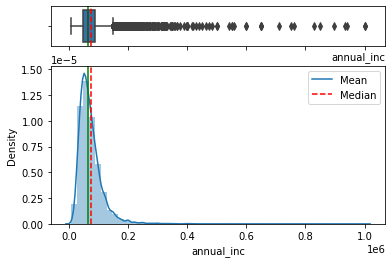

In [ ]:
boxhist("annual_inc")

In [ ]:
#Se decide llenar los valores nulos con el promedio. 

banco["annual_inc"] = banco.annual_inc.fillna(banco.annual_inc.mean())
print(f"Relleno hecho. Se detectaron anomalías?: {banco.annual_inc.isnull().values.any()}")

Relleno hecho. Se detectaron anomalías?: False


**Tenencia de la vivienda** (home_ownership)

In [ ]:
banco.home_ownership.value_counts(dropna=False)

MORTGAGE    9744
RENT        6959
OWN         1600
NaN         1476
Name: home_ownership, dtype: int64

In [ ]:
#Se decide llenar los valores nulos con el valor inmediato anterior al NaN. Esta estrategia es conocida como 'Mode Imputation'. 

banco["home_ownership"] = banco.home_ownership.fillna(banco.home_ownership.value_counts().index[0])
print(f"Imputation hecha. Valores nulos: {banco.home_ownership.isnull().sum()}")

Imputation hecha. Valores nulos: 0


**DTI** 

In [ ]:
banco.dti.value_counts(dropna=False)

NaN      152
15.87     20
19.64     20
19.25     19
11.45     19
        ... 
34.32      1
0.11       1
1.61       1
1.47       1
32.53      1
Name: dti, Length: 3286, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


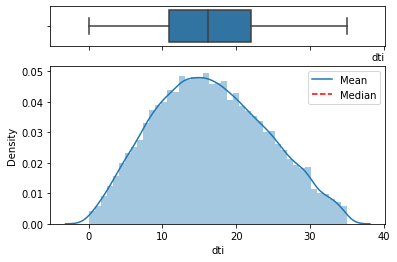

In [ ]:
boxhist("dti")

In [ ]:
#se decide llenar los nulos con la media. 

banco["dti"] = banco.dti.fillna(banco.dti.mean())
print(f"Relleno completado. Valores nulos: {banco.dti.isnull().values.any()}")

Relleno completado. Valores nulos: False


**‘last_major_derog_none’**

In [ ]:
abs_mv = banco.last_major_derog_none.value_counts(dropna=False)
pc_mv = banco.last_major_derog_none.value_counts(dropna=False, normalize=True) * 100
pc_mv_df = pd.DataFrame(pc_mv)
pc_mv_df.rename(columns={"last_major_derog_none":"Percent %"}, inplace=True)
abs_pc = pd.concat([abs_mv,pc_mv_df], axis=1)
abs_pc

,last_major_derog_none,Percent %
NaN,19208,97.113100
1.0,435,2.199302
0.0,136,0.687598


In [ ]:
#se decide eliminar la columna por la gran falta de datos. 

banco.drop("last_major_derog_none", axis=1, inplace=True)

In [ ]:
print(f"Los valores nulos del dataset fueron resueltos: {banco.notnull().values.any()}")

Los valores nulos del dataset fueron resueltos: True


# Sección 7 - Selección de variables

In [ ]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19779 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19779 non-null  int64  
 1   grade               19779 non-null  object 
 2   annual_inc          19779 non-null  float64
 3   short_emp           19779 non-null  int64  
 4   emp_length_num      19779 non-null  int64  
 5   home_ownership      19779 non-null  object 
 6   dti                 19779 non-null  float64
 7   purpose             19779 non-null  object 
 8   term                19779 non-null  object 
 9   last_delinq_none    19779 non-null  int64  
 10  revol_util          19779 non-null  float64
 11  total_rec_late_fee  19779 non-null  float64
 12  od_ratio            19779 non-null  float64
 13  bad_loan            19779 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.3+ MB


In [ ]:
#elimino el id ya que es irrelevante tanto para graficar como para el modelo. 
banco.drop("id", axis=1, inplace=True)

**Variables númericas y categóricas/binarias**

In [ ]:
#selección de númericas
data_nu = banco.select_dtypes(exclude=["object","category"]).copy()

In [ ]:
#subsets

Xnum = data_nu.drop(["bad_loan"], axis= "columns")
ynum = data_nu.bad_loan

**Identificación de variables relevantes a través de la correlación de Pearson**

In [ ]:
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
annual_inc,-0.1227,0.0000
short_emp,0.0368,0.0000
emp_length_num,-0.0406,0.0000
dti,0.1394,0.0000
last_delinq_none,0.0216,0.0024
revol_util,0.1013,0.0000
total_rec_late_fee,0.0240,0.0007
od_ratio,0.0007,0.9214


En este caso voy a eliminar od_ratio, ya que tiene un p-value > 0.5. Esto nos demuestra que es poco relevante en cuanto al target (badLoan) 

In [ ]:
#selección de categóricas. 
Xcat = banco.select_dtypes(exclude=['int64','float64']).copy()

In [ ]:
#subesets
Xcat['target'] = banco.bad_loan
Xcat.dropna(how="any", inplace=True)
ycat = Xcat.target
Xcat.drop("target", axis=1, inplace=True)

In [ ]:
for col in Xcat.columns:
    table = pd.crosstab(Xcat[col], ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

target,0,1
grade,,
A,2030,120
B,5257,736
C,4375,1127
D,2566,947
E,1099,516
F,509,333
G,102,62


p-value: 0.0000000000000000000000000



target,0,1
home_ownership,,
MORTGAGE,9298,1922
OWN,1293,307
RENT,5347,1612


p-value: 0.0000000000000000000001931



target,0,1
purpose,,
car,138,30
credit_card,3424,679
debt_consolidation,9824,2386
home_improvement,881,199
house,85,12
major_purchase,289,83
medical,135,37
moving,92,28
other,745,261


p-value: 0.0000000000000872350281927



target,0,1
term,,
36 Months,26,5
36 months,12390,2432
60 months,3522,1404


p-value: 0.0000000000000000000000000


Todas las variables poseen un p-value menor a 0.5. De aqui obtenemos la información que las catgóricas tienen alta importancia. 

# Sección 8 - Encoding
En este apartado se preparan los datos para que puedan ser utlizados en un modelo de machine learning

In [ ]:
#La variable 'grade' es categórica ordinal, por lo que las podemos pasar directeamente a números. 
banco["grade"] = banco.grade.map({"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1})

In [ ]:
#Por otro lado, para las demás categóricas hay que utilzar otro método de encoding, que puede ser Binary encoding o One hot encoding

df_term = banco.term
df_home = banco.home_ownership
df_purp = banco.purpose

In [ ]:
#term
t_ohe = pd.get_dummies(df_term)
bin_enc_term = ce.BinaryEncoder()
t_bin = bin_enc_term.fit_transform(df_term)
#home_ownsership
h_ohe = pd.get_dummies(df_home)
bin_enc_home = ce.BinaryEncoder()
h_bin = bin_enc_home.fit_transform(df_home)
#purpose
p_ohe = pd.get_dummies(df_purp)
bin_enc_purp = ce.BinaryEncoder()
p_bin = bin_enc_purp.fit_transform(df_purp)

In [ ]:
p_bin

,purpose_0,purpose_1,purpose_2,purpose_3
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,1,1
4,0,0,1,0
...,...,...,...,...
19995,0,0,1,0
19996,0,1,1,1
19997,0,0,1,0
19998,0,0,1,0


In [ ]:
t_ohe

,36 Months,36 months,60 months
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
19995,0,1,0
19996,0,1,0
19997,0,1,0
19998,0,1,0


In [ ]:
h_bin

,home_ownership_0,home_ownership_1
0,0,1
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
19995,0,1
19996,1,1
19997,1,1
19998,1,1


In [ ]:
h_ohe

,MORTGAGE,OWN,RENT
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
19995,0,0,1
19996,1,0,0
19997,1,0,0
19998,1,0,0


En este caso, voy a utilizar el método de binary encoder solo con el proposito ('purpose') y el método one hot encoder con las columnas de tenencia de la vivienda ('home_ownership') y con el plazo del préstamo ('term'). 

In [ ]:
#One Hot Encoding (OHE)
data = pd.get_dummies(banco, columns=["term","home_ownership"])

In [ ]:
#Binary Encoding
bin_enc = ce.BinaryEncoder()
data_bin = bin_enc.fit_transform(banco.purpose)

In [ ]:
#se concatenan los datasets 
df = pd.concat([data,data_bin],axis=1)

#se borra 'purpose'
df.drop(["purpose"], axis=1, inplace=True)

#se pasa todo a minúscula
df.columns = [x.lower() for x in df.columns]

df.head()

,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,term_ 36 months,term_ 36 months,term_ 60 months,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_0,purpose_1,purpose_2,purpose_3
0,7,100000.0,1,1,26.27,1,43.2,0.0,0.160624,0,0,1,0,0,0,1,0,0,0,1
1,7,83000.0,0,4,5.39,0,21.5,0.0,0.810777,0,0,1,0,0,1,0,0,0,0,1
2,4,78000.0,0,11,18.45,1,46.3,0.0,0.035147,1,0,0,1,1,0,0,0,0,1,0
3,4,37536.0,0,6,12.28,0,10.7,0.0,0.534887,1,0,0,1,1,0,0,0,0,1,1
4,4,65000.0,0,11,11.26,0,15.2,0.0,0.166500,0,0,1,0,1,0,0,0,0,1,0


Ahora, el dataset esta preparado para entrenar modelos. 

# Sección 9 - Machine Learning 
Lo primero que hay que entender es que el target del proyecto es una varibale binaria, ya que el cliente pagó o no pagó la deuda. Por lo tanto se utilizaran técnicas de clasificación. 

Por otro lado, el dataset está desbalanceado, por lo que será más dificil detectar, para el modelo, el valor sobre el target seleccionado. En este caso el 20% del dataset se encuentra en mora, que es lo que deseamos detectar. Por esto decidí utilizar una métrica llamada AUC ROC, que sirve para evalaluar esta clase modelos. Este se traduce como area debajo de la curva.

Otra aclaración que vale la pena hacer, cuando aprezca la palabra 'seed', equivale a una variable nombrada al principio. Se usa para establecer el random_state.

In [ ]:
# AUC ROC 
def auc_roc_plot(y_test, y_preds):
    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**Regresión logistica**

In [ ]:
#Copia del dataset
df_lr = df.copy()

#División 80-20 (entrenamiento y testeo)
train_set_lr, test_set_lr = train_test_split(df_lr, test_size = 0.2, random_state = seed)
X_train_lr = train_set_lr.drop(['bad_loan'], axis = 1)
y_train_lr = train_set_lr['bad_loan']

X_test_lr = test_set_lr.drop(['bad_loan'], axis = 1)
y_test_lr = test_set_lr['bad_loan']

#Normalización del dataset
scaler_lr = MinMaxScaler()
features_names = X_train_lr.columns

X_train_lr = scaler_lr.fit_transform(X_train_lr)
X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)

X_test_lr = scaler_lr.transform(X_test_lr)
X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)

lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight ='balanced' )
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train_lr, y_train_lr)

In [ ]:
#hiperparametros
clf_lr

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
#los mejores hiper
clf_lr.best_estimator_

LogisticRegression(C=100, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [ ]:
#score
clf_lr.score(X_test_lr, y_test_lr)

0.653437815975733

0.7065302557704305


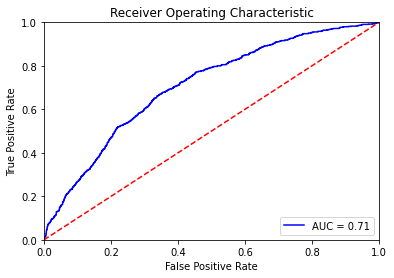

In [ ]:
#Valuando 
y_preds_lr = clf_lr.predict_proba(X_test_lr)[:,1]
auc_roc_plot(y_test_lr, y_preds_lr)

Da un area bajo la curva de 0.71

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


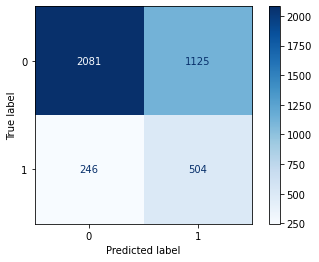

In [ ]:
# Confusion Matrix display
plot_confusion_matrix(clf_lr, X_test_lr, y_test_lr, values_format=".4g", cmap="Blues");

#Será utilizado en la comparación final
tn, fp, fn, tp = confusion_matrix(y_test_lr == 1, y_preds_lr > 0.5).ravel()
tn_lr = tn
fp_lr = fp
fn_lr = fn
tp_lr = tp

In [ ]:
total = (tn_lr/3956*100).round(2), (fp_lr/3956*100).round(2), (fn_lr/3956*100).round(2), (tp_lr/3956*100).round(2)
total

(52.6, 28.44, 6.22, 12.74)

**KN neighbors**

In [ ]:
#Copia del dataset
df_knn = df.copy()

#División 80-20 (entrenamiento y testeo)
train_set_knn, test_set_knn = train_test_split(df_knn, test_size = 0.2, random_state = seed)
X_train_knn = train_set_knn.drop(['bad_loan'], axis = 1)
y_train_knn = train_set_knn['bad_loan']
X_test_knn = test_set_knn.drop(['bad_loan'], axis = 1)
y_test_knn = test_set_knn['bad_loan']

#Normalización del dataset 
scaler_knn = MinMaxScaler()
features_names = X_train_knn.columns
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)
X_test_knn = scaler_knn.transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

In [ ]:
for k in range(1, 200, 5):
    k = k + 1
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn, y_train_knn)
    acc = knn.score(X_test_knn, y_test_knn)
    print('Accuracy for k =', k, ' is:', acc)

Accuracy for k = 2  is: 0.7909504550050556
Accuracy for k = 7  is: 0.7942366026289182
Accuracy for k = 12  is: 0.8068756319514662
Accuracy for k = 17  is: 0.8063700707785642
Accuracy for k = 22  is: 0.8086450960566228
Accuracy for k = 27  is: 0.8081395348837209
Accuracy for k = 32  is: 0.8099089989888777
Accuracy for k = 37  is: 0.8109201213346815
Accuracy for k = 42  is: 0.8111729019211324
Accuracy for k = 47  is: 0.8106673407482305
Accuracy for k = 52  is: 0.8094034378159757
Accuracy for k = 57  is: 0.8104145601617796
Accuracy for k = 62  is: 0.8101617795753286
Accuracy for k = 67  is: 0.8104145601617796
Accuracy for k = 72  is: 0.8101617795753286
Accuracy for k = 77  is: 0.8101617795753286
Accuracy for k = 82  is: 0.8104145601617796
Accuracy for k = 87  is: 0.8104145601617796
Accuracy for k = 92  is: 0.8101617795753286
Accuracy for k = 97  is: 0.8099089989888777
Accuracy for k = 102  is: 0.8101617795753286
Accuracy for k = 107  is: 0.8104145601617796
Accuracy for k = 112  is: 0.8101

El valor más alto es el de k = 47

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 47, weights='uniform').fit(X_train_knn, y_train_knn)
y_preds_knn = knn.predict(X_test_knn)

In [ ]:
knn.score(X_test_knn, y_test_knn)

0.8106673407482305

0.5057737575379496


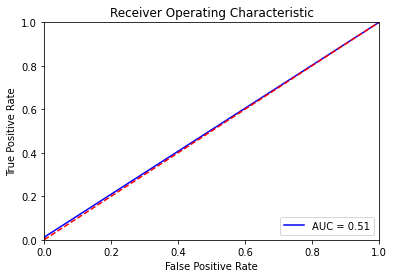

In [ ]:
auc_roc_plot(y_test_knn, y_preds_knn)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


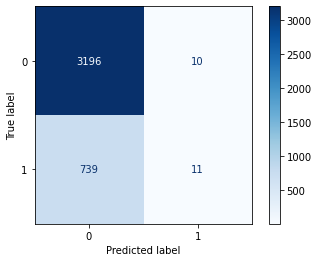

In [ ]:
# Confusion Matrix display
plot_confusion_matrix(knn, X_test_knn, y_test_knn, values_format=".4g", cmap="Blues");

#Será utilizado en la comparación final
tn, fp, fn, tp = confusion_matrix(y_test_knn == 1, y_preds_knn > 0.5).ravel()
tn_knn = tn
fp_knn = fp
fn_knn = fn
tp_knn = tp

In [ ]:
total_knn = (tn_knn/3956*100).round(2),(fp_knn/3956*100).round(2), (fn_knn/3956*100).round(2),(tp_knn/3956*100).round(2)
total_knn

(80.79, 0.25, 18.68, 0.28)

**Support Vector Machine (SVC)**

In [ ]:
#Copia del dataset
df_svm = df.copy()

#División 80-20 (entrenamiento y testeo)
train_set_svc, test_set_svc = train_test_split(df_svm, test_size = 0.2, random_state = seed)
X_train_svc = train_set_svc.drop(['bad_loan'], axis = 1)
y_train_svc = train_set_svc['bad_loan']
X_test_svc = test_set_svc.drop(['bad_loan'], axis = 1)
y_test_svc = test_set_svc['bad_loan']

#Normalización del dataset
zscore_svc = StandardScaler()
features_names = X_train_svc.columns
X_train_svc = zscore_svc.fit_transform(X_train_svc)
X_train_svc = pd.DataFrame(X_train_svc, columns = features_names)
X_test_svc = zscore_svc.transform(X_test_svc)
X_test_svc = pd.DataFrame(X_test_svc, columns = features_names)

In [ ]:
svc = SVC(random_state=seed, class_weight='balanced',probability=True, verbose=True)
parameters = {'C':[0.1, 1, 10]}
clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train_svc, y_train_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
clf_svc.score(X_test_svc, y_test_svc)

0.6562184024266936

0.6783738823040133


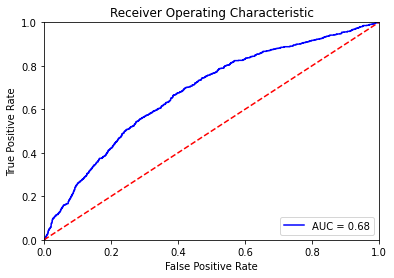

In [ ]:
y_preds_svc = clf_svc.predict_proba(X_test_svc)[:,1]
auc_roc_plot(y_test_svc, y_preds_svc)

Tiene un score de 0.68

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


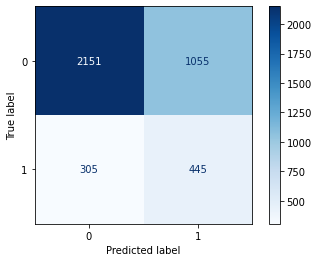

In [ ]:
#Confusion Matriz
plot_confusion_matrix(clf_svc, X_test_svc, y_test_svc, values_format=".4g", cmap="Blues");

#Será utilizado en la comparación final
tn, fp, fn, tp = confusion_matrix(y_test_svc == 1, y_preds_svc > 0.5).ravel()
tn_svc = tn
fp_svc = fp
fn_svc = fn
tp_svc = tp

In [ ]:
total_svc = (tn_svc/3956*100).round(2),(fp_svc/3956*100).round(2), (fn_svc/3956*100).round(2),(tp_svc/3956*100).round(2)
total_svc

(81.02, 0.03, 18.96, 0.0)

**Árbol de decisión**

In [ ]:
#Copia de dataset
df_trees = df.copy()

#División 80-20 (entrenamiento y testeo)
train_set_dt, test_set_dt = train_test_split(df_trees, test_size = 0.2, random_state = seed)
X_train_dt = train_set_dt.drop(['bad_loan'], axis = 1)
y_train_dt = train_set_dt['bad_loan']
X_test_dt = test_set_dt.drop(['bad_loan'], axis = 1)
y_test_dt = test_set_dt['bad_loan']

clf_tree = tree.DecisionTreeClassifier(random_state = seed, max_depth = 10).fit(X_train_dt, y_train_dt)

In [ ]:
clf_tree.score(X_test_dt, y_test_dt)

0.7810920121334681

In [ ]:
#viendo las variables más importantes
important_features = pd.DataFrame(data = clf_tree.feature_importances_, index = X_train_dt.columns, columns = ["value"])
important_features.sort_values(by = "value", ascending = False)

,value
grade,0.216024
dti,0.210769
annual_inc,0.160650
od_ratio,0.142699
revol_util,0.132406
emp_length_num,0.031404
term_ 60 months,0.021059
purpose_1,0.017130
home_ownership_rent,0.016627
purpose_2,0.012542


0.6270029112081514


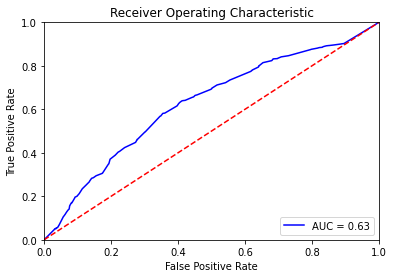

In [ ]:
y_preds_dt = clf_tree.predict_proba(X_test_dt)[:,1]
#AUC ROC
auc_roc_plot(y_test_dt, y_preds_dt)

Tiene un score de 0.63

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


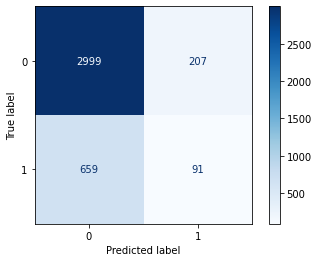

In [ ]:
# Confusion Matrix display
plot_confusion_matrix(clf_tree, X_test_dt, y_test_dt, values_format=".4g", cmap="Blues");

#Será utilizado en la comparación final
tn, fp, fn, tp = confusion_matrix(y_test_dt == 1, y_preds_dt > 0.5).ravel()
tn_dt = tn
fp_dt = fp
fn_dt = fn
tp_dt = tp

In [ ]:
total_dt = (tn_dt/3956*100).round(2), (fp_dt/3956*100).round(2), (fn_dt/3956*100).round(2),(tp_dt/3956*100).round(2)
total_dt

(75.81, 5.23, 16.66, 2.3)

**Random Forest**

In [ ]:
#Copia Dataset
df_rf = df.copy()

#División 80-20 (entrenamiento y testeo)
train_set_rf, test_set_rf = train_test_split(df_rf, test_size = 0.2, random_state = seed)
X_train_rf = train_set_rf.drop(['bad_loan'], axis = 1)
y_train_rf = train_set_rf['bad_loan']
X_test_rf = test_set_rf.drop(['bad_loan'], axis = 1)
y_test_rf = test_set_rf['bad_loan']

In [ ]:
#entrenamiento del modelo
rf = RandomForestClassifier(random_state = seed, class_weight = None).fit(X_train_rf, y_train_rf)

#se establecen los paraemtros 
parameters = {'n_estimators':[10, 100, 300, 1000]}
clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train_rf, y_train_rf)

In [ ]:
clf_rf.score(X_test_rf, y_test_rf)

0.8040950455005056

0.6811767519234768


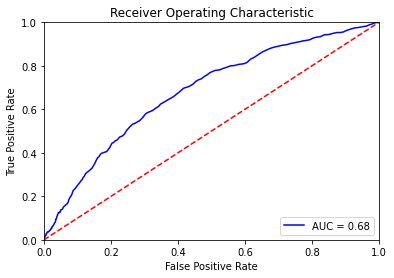

In [ ]:
y_preds_rf = clf_rf.predict_proba(X_test_rf)[:,1]
#AUC ROC
auc_roc_plot(y_test_rf, y_preds_rf)

Tiene un score de 0.68

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


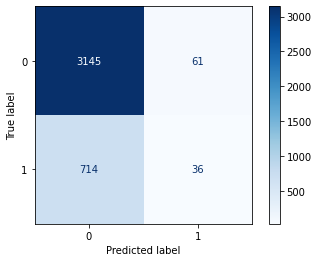

In [ ]:
#Matriz de confusión
plot_confusion_matrix(clf_rf, X_test_rf, y_test_rf, values_format=".4g", cmap="Blues");

#Será utilizado en la comparación final
tn, fp, fn, tp = confusion_matrix(y_test_rf == 1, y_preds_rf > 0.5).ravel()
tn_rf = tn
fp_rf = fp
fn_rf = fn
tp_rf = tp

In [ ]:
total_rf = (tn_rf/3956*100).round(2), (fp_rf/3956*100).round(2), (fn_rf/3956*100).round(2),(tp_rf/3956*100).round(2)
total_rf

(79.5, 1.54, 18.05, 0.91)

**Red Neuronal**

In [ ]:
#Copia de dataset
df_nn = df.copy()

#División 80-20 (entrenamiento y testeo)
train_set_nn, test_set_nn = train_test_split(df_nn, test_size = 0.2, random_state = seed)
X_train_nn = train_set_nn.drop(['bad_loan'], axis = 1)
y_train_nn = train_set_nn['bad_loan']
X_test_nn = test_set_nn.drop(['bad_loan'], axis = 1)
y_test_nn = test_set_nn['bad_loan']

#Normalización del dataset
scaler_nn = MinMaxScaler()
features_names = X_train_nn.columns
X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_train_nn = pd.DataFrame(X_train_nn, columns = features_names)
X_test_nn = scaler_nn.transform(X_test_nn)
X_test_nn = pd.DataFrame(X_test_nn, columns = features_names)

In [ ]:
mlp_nn = MLPClassifier(solver = 'adam', random_state = seed, max_iter = 1000 )
#se establecen los parametros
parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}
clf_nn = GridSearchCV(mlp_nn, parameters, cv = 5).fit(X_train_nn, y_train_nn)

In [ ]:
#score
clf_nn.score(X_test_nn, y_test_nn)

0.8106673407482305

0.7077446454564359


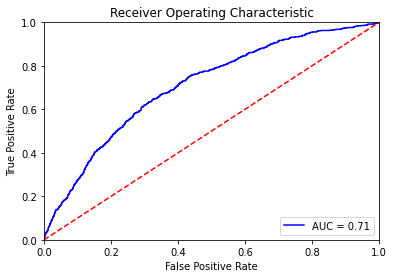

In [ ]:
y_preds_nn = clf_nn.predict_proba(X_test_nn)[:,1]
#AUC ROC
auc_roc_plot(y_test_nn, y_preds_nn)

Tiene un score de 0.7

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


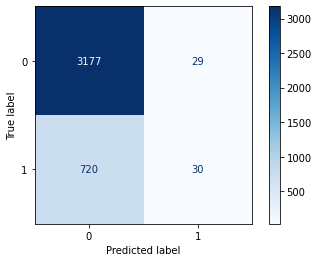

In [ ]:
#Matriz de confusión
plot_confusion_matrix(clf_nn, X_test_nn, y_test_nn, values_format=".4g", cmap="Blues");
#Será utilizado en la comparación final
tn, fp, fn, tp = confusion_matrix(y_test_nn == 1, y_preds_nn > 0.5).ravel()
tn_nn = tn
fp_nn = fp
fn_nn = fn
tp_nn = tp

In [ ]:
total_nn = (tn_nn/3956*100).round(2), (fp_nn/3956*100).round(2),(fn_nn/3956*100).round(2),(tp_nn/3956*100).round(2)
total_nn

(80.31, 0.73, 18.2, 0.76)